# Network Analysis


In [ ]:
import contextily as ctx
import geopandas as gpd
import matplotlib as mpl
import matplotlib.patheffects as pe
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd

## Data Load

In [3]:
data = pd.read_csv("./data/data-sample.csv")
edges = pd.read_csv("./data/edges-sample.csv")

### Create Graph

In [4]:
G = nx.DiGraph()
G.add_edges_from(edges.values)

### Add geographical information

In [5]:
# Target CRS for analysis and plotting
EPSG = 25832

In [6]:
data["geometry"] = gpd.points_from_xy(x=data.lons, y=data.lats)

gdf = gpd.GeoDataFrame(data)
gdf = gdf.set_crs(epsg=4326)
gdf = gdf.to_crs(epsg=EPSG)

In [63]:
# Geographical position of nodes in the overall graph
gdf["lat"] = gdf.geometry.y
gdf["lon"] = gdf.geometry.x

pos = gdf[gdf["id"].isin(G.nodes)][["id", "lon", "lat"]]
pos.set_index("id", inplace=True)
pos = dict(zip(pos.index, pos.values))

In [11]:
states = gpd.read_file("data/geodata/states.gpkg")
states = states[states["NAME_1"] == "Baden-Württemberg"]
states = states.to_crs(epsg=EPSG)

In [12]:
countries = gpd.read_file("data/geodata/countries.gpkg")

In [13]:
countries = countries.to_crs(EPSG)

In [52]:
data

id  id_internal  employees  founding_year  indegree  outdegree  \
0        0            0        NaN         2018.0         0          0   
1        1            0       30.0         1968.0         0          4   
2        2            0        NaN            NaN         0          1   
3        3            0       38.0         1998.0         0          0   
4        4            0       28.0         1996.0         3          1   
...    ...          ...        ...            ...       ...        ...   
7358  7358            0        2.0         2020.0         0          0   
7359  7359            0       70.0         1933.0         1          0   
7360  7360            0       43.0         1989.0         0          0   
7361  7361            0        NaN            NaN         0          0   
7362  7362            0        NaN         1899.0         0          4   

      innoprob  sustainability_intensity  ai_intensity  3d_printing_intensity  \
0     0.588983                  0.000000      0.093298                    0.0   
1     0.186376                  0.169784      0.000000                    0.0   
2     0.646838                  0.000000      0.153976                    0.0   
3     0.131300                  0.393100      0.000000                    0.0   
4     0.753414                  0.223325      0.000000                    0.0   
...        ...                       ...           ...                    ...   
7358       NaN                       NaN           NaN                    NaN   
7359  0.558879                  0.000000      0.000000                    0.0   
7360  0.311190                  0.000000      0.000000                    0.0   
7361  0.242100                  0.000000      0.000000                    0.0   
7362  0.130272                  0.000000      0.000000                    0.0   

           lats       lons                   geometry  
0     49.380095   9.563306   POINT (9.56331 49.38009)  
1     47.620564   9.162125   POINT (9.16212 47.62056)  
2     48.148482   8.062396    POINT (8.0624 48.14848)  
3     49.795432   8.073948   POINT (8.07395 49.79543)  
4     47.528820   9.080853   POINT (9.08085 47.52882)  
...         ...        ...                        ...  
7358  49.608967  10.236647  POINT (10.23665 49.60897)  
7359  47.908257   9.402315   POINT (9.40232 47.90826)  
7360  48.531946  10.317548  POINT (10.31755 48.53195)  
7361  48.214739   9.575864   POINT (9.57586 48.21474)  
7362  48.457425   9.944373   POINT (9.94437 48.45743)  

[7363 rows x 13 columns]

In [14]:
# Ravensburg 47.78280822171495, 9.611101464378356
# Konstanz 47.67505184676883, 9.172817383708908
city_data = {
    "Rank": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    "CITY_NAME": [
        "Stuttgart",
        "Karlsruhe",
        "Mannheim",
        "Freiburg im Breisgau",
        "Heidelberg",
        "Ulm",
        "Heilbronn",
        "Pforzheim",
        "Reutlingen",
        "Esslingen am Neckar",
        "Ravensburg",
        "Konstanz",
    ],
    "Population (approx.)": [
        635000,
        310000,
        310000,
        230000,
        160000,
        125000,
        125000,
        125000,
        115000,
        95000,
        None,
        None,
    ],
    "lat": [
        48.7758,
        49.0069,
        49.4875,
        47.9990,
        49.3988,
        48.4011,
        49.1427,
        48.8922,
        48.4914,
        48.7405,
        47.78280822171495,
        47.67505184676883,
    ],
    "lon": [
        9.1829,
        8.4037,
        8.4660,
        7.8421,
        8.6724,
        9.9876,
        9.2109,
        8.6946,
        9.2116,
        9.3114,
        9.611101464378356,
        9.172817383708908,
    ],
}

cities = pd.DataFrame(city_data)
cities = cities[
    ~cities["CITY_NAME"].isin(["Pforzheim", "Reutlingen", "Esslingen am Neckar"])
]

In [15]:
cities = gpd.GeoDataFrame(
    cities, crs=4326, geometry=gpd.points_from_xy(x=cities.lon, y=cities.lat)
)
cities = cities.to_crs(epsg=EPSG)

In [16]:
cities

Rank             CITY_NAME  Population (approx.)        lat       lon  \
0      1             Stuttgart              635000.0  48.775800  9.182900   
1      2             Karlsruhe              310000.0  49.006900  8.403700   
2      3              Mannheim              310000.0  49.487500  8.466000   
3      4  Freiburg im Breisgau              230000.0  47.999000  7.842100   
4      5            Heidelberg              160000.0  49.398800  8.672400   
5      6                   Ulm              125000.0  48.401100  9.987600   
6      7             Heilbronn              125000.0  49.142700  9.210900   
10    11            Ravensburg                   NaN  47.782808  9.611101   
11    12              Konstanz                   NaN  47.675052  9.172817   

                          geometry  
0    POINT (513437.706 5402549.15)  
1   POINT (456391.246 5428394.106)  
2    POINT (461324.59 5481788.165)  
3   POINT (413624.804 5316837.716)  
4   POINT (476230.417 5471841.618)  
5   POINT (573097.225 5361353.517)  
6   POINT (515381.637 5443340.671)  
10  POINT (545776.346 5292341.518)  
11  POINT (512972.144 5280199.078)

In [17]:
gdf.to_crs(epsg=EPSG, inplace=True)
cities.to_crs(epsg=EPSG, inplace=True)

In [18]:
states.crs == countries.crs == gdf.crs == cities.crs

True

## Community Calculations

In [19]:
len(G.nodes), len(data)

(1051, 7363)

### Sampled Louvain

In [ ]:
# The original results used for the submission, using the full dataset as input.
# We can only provide a sample here, please contact the repo owners if you want to reproduce the full results.
# df_sampled_louvain = pd.read_csv("results/louvain-results-original.csv")

In [30]:
n_runs = 10

res = []

for i in range(n_runs):
    if i % 10 == 0:
        print(f"Running iteration {i}")
    comms = nx.community.louvain.louvain_communities(G)
    comms = np.array(sorted(comms, key=len, reverse=True))
    mod_value = nx.community.modularity(G, comms)
    res.append((i, mod_value, comms))

df_sampled_louvain = pd.DataFrame(
    columns=["run", "modularity", "communities"],
    data=res,
)

Running iteration 0


In [35]:
col = []

for comm_run in df_sampled_louvain.communities:
    row = []
    for comms in comm_run:
        comms_new = []
        for c in comms:
            comms_new.append(int(c))
        row.append(comms_new)
    col.append(row)

df_sampled_louvain["communities"] = col
# df_sampled_louvain.to_csv("results/louvain-results.csv", index=False)

In [36]:
best_run_ix = df_sampled_louvain.sort_values(by="modularity", ascending=False).index[0]
communities = df_sampled_louvain.iloc[best_run_ix]["communities"]

In [37]:
df_sampled_louvain.iloc[best_run_ix]  # 0.68

run                                                            5
modularity                                              0.900283
communities    [[1025, 2, 776, 1289, 6675, 1044, 3354, 1307, ...
Name: 5, dtype: object

In [38]:
result = []
for comms in communities:
    result.append([int(c) for c in comms])

communities = result

In [43]:
communities_length = [len(c) for c in communities]
comms = pd.DataFrame(
    data={
        "length": communities_length,
        "communities": communities,
    }
)

comms = comms.sort_values(by="length", ascending=False)
comms.reset_index(drop=True, inplace=True)

### Plot network nodes geographically, color code the community

In [ ]:
# For simplicity, plot only twenty largest
comms_plot = comms[:20]
cmap = mpl.colormaps["tab20"]
color_values = []
for i in range(20):
    color_values.append(cmap(i))

comms_plot["color"] = color_values

/tmp/ipykernel_92906/3656950591.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comms_plot["color"] = color_values


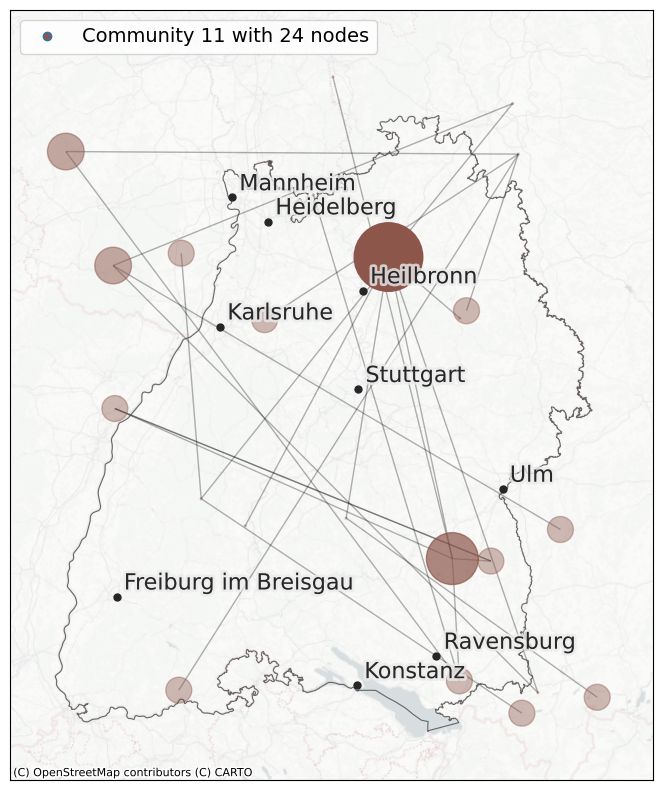

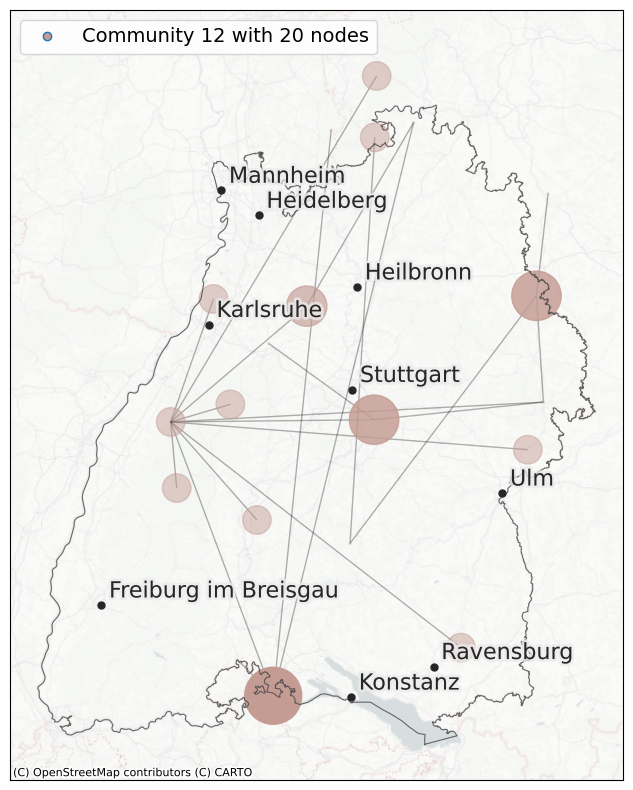

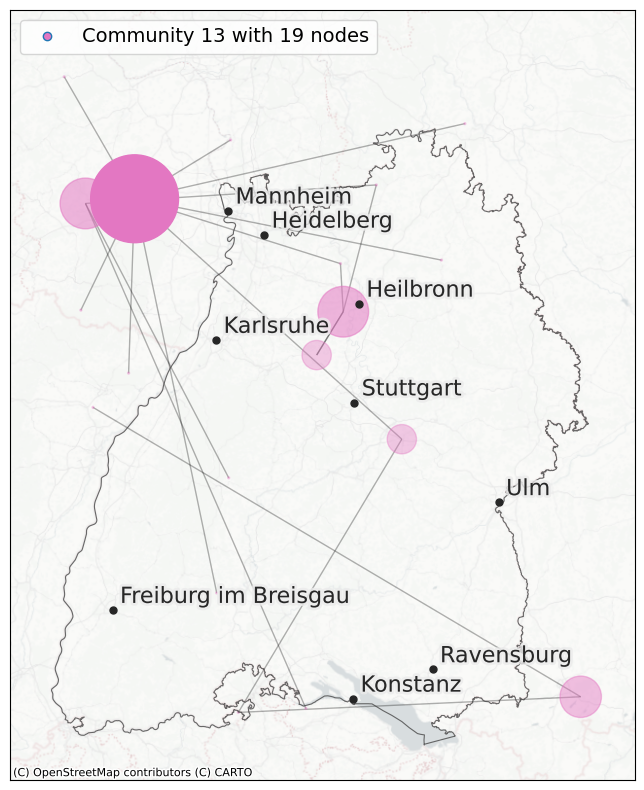

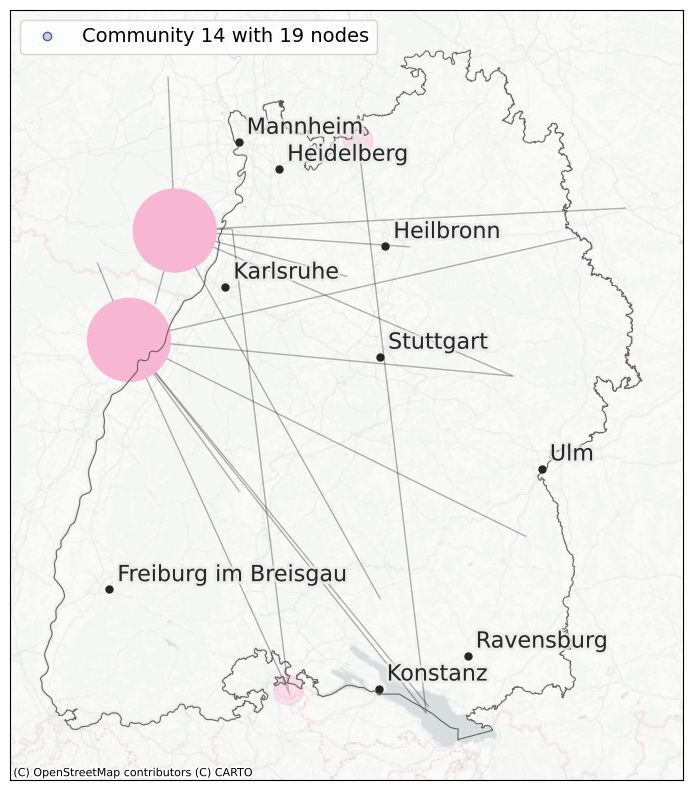

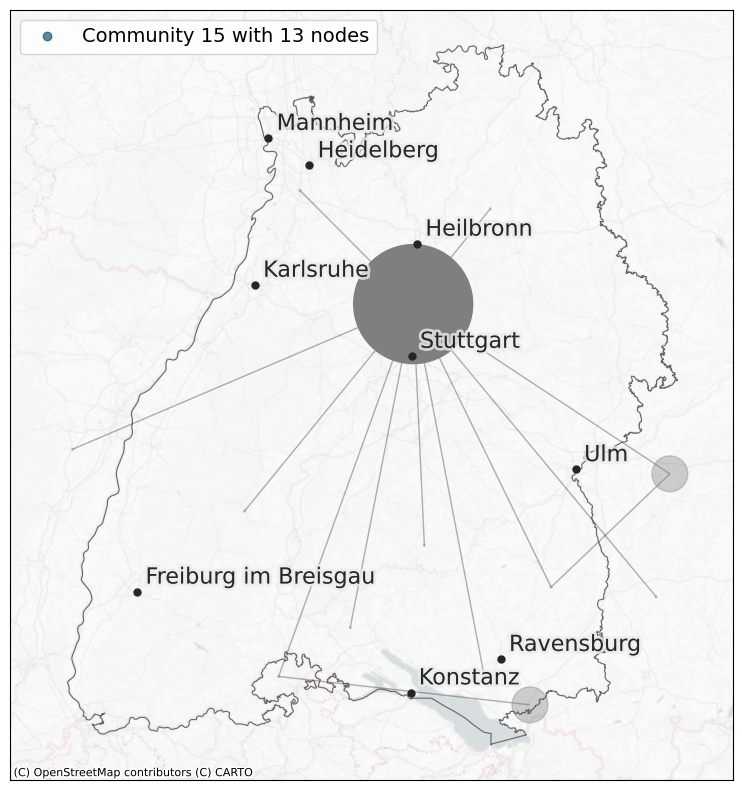

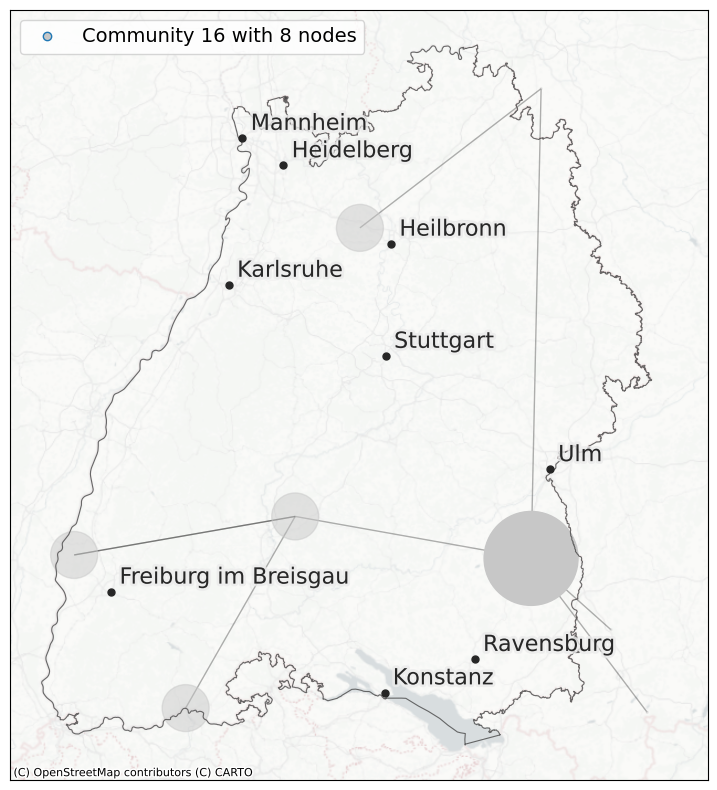

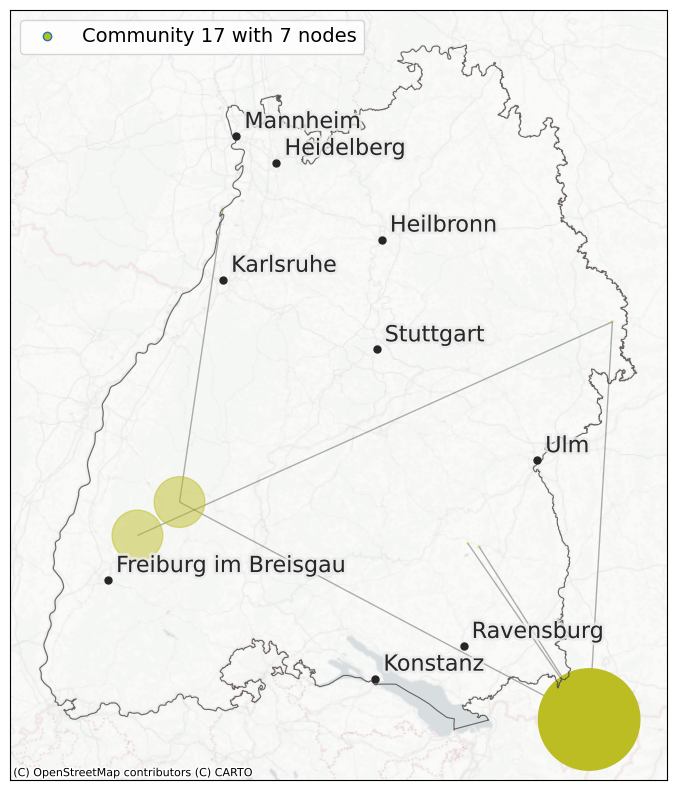

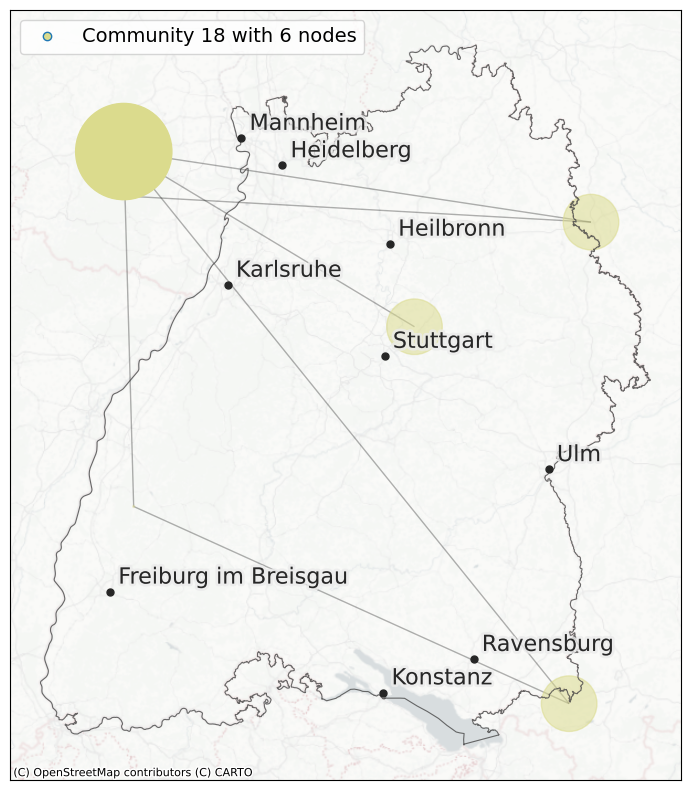

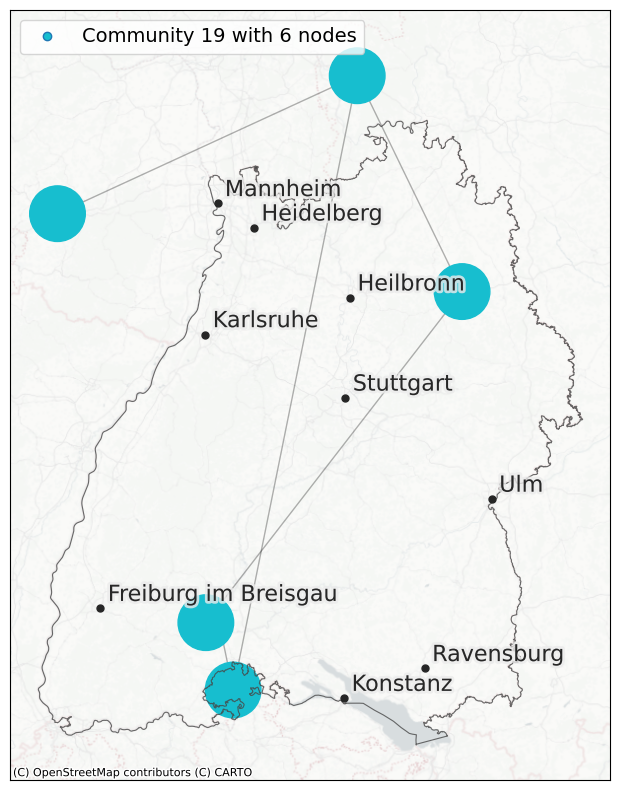

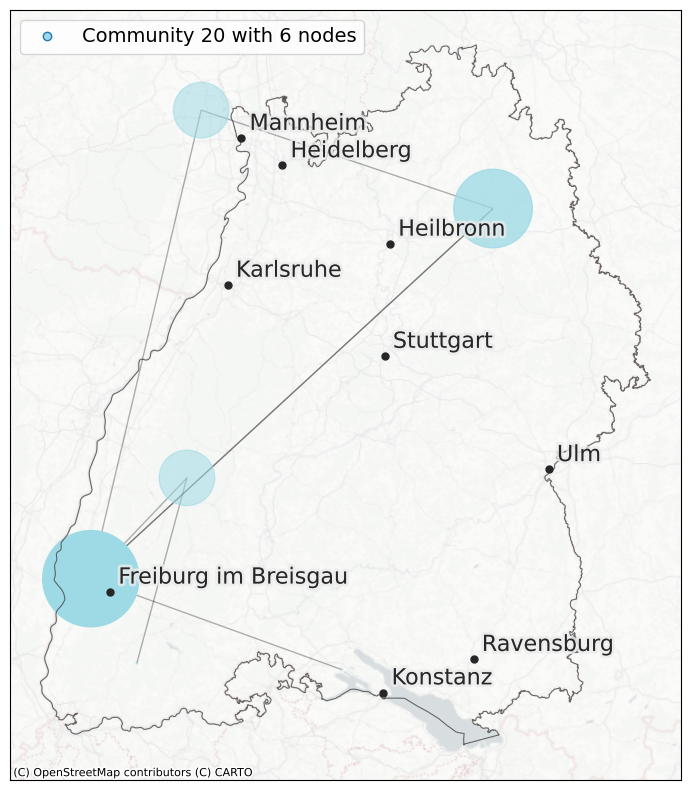

In [66]:
alpha_min = 0.3
alpha_max = 1

for i, row in comms_plot[10:20].iterrows():
    fig, ax = plt.subplots(figsize=(10, 10))

    length, c, color = row

    G_comm = nx.subgraph(
        G,
        c,
    )

    node_size = np.array(list(nx.in_degree_centrality(G_comm).values())) * 8000 + 2
    alpha = (node_size - node_size.min()) / (node_size.max() - node_size.min()) * (
        alpha_max - alpha_min
    ) + alpha_min

    nx.draw_networkx_edges(
        G_comm,
        pos=pos,
        arrows=False,
        alpha=0.3,
        ax=ax,
    )

    nx.draw_networkx_nodes(
        G_comm,
        pos=pos,
        ax=ax,
        alpha=alpha,  # 0.6,
        node_size=node_size,
        node_color=color,
        node_shape="o",
    )

    states.boundary.plot(ax=ax, edgecolor="#474747", linewidth=0.8, alpha=0.8)

    ax.plot(
        cities.geometry.x,
        cities.geometry.y,
        linestyle="None",
        marker="o",
        color="#262626",
        ms=5,
    )
    for _, row in cities.iterrows():
        ax.annotate(
            row["CITY_NAME"],
            (row.geometry.x + 3 * 10**3, row.geometry.y + 3 * 10**3),
            color="black",
            fontsize=16,
            alpha=0.8,
            path_effects=[pe.withStroke(linewidth=4, foreground="#ebebeb")],
        )
    basemap = ctx.providers.CartoDB.PositronNoLabels
    ctx.add_basemap(ax, crs=countries.crs.to_string(), source=basemap, alpha=0.9)

    c = mpl.lines.Line2D([], [], marker="o", markerfacecolor=color, linewidth=0)
    ax.legend(
        [c],
        [f"Community {i+1} with {len(G_comm.nodes)} nodes"],
        loc="upper left",
        prop={"size": 14},
    )